### MODEL

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\dilara\Downloads\miuul makine ogrenmesi\datasets\hitters.csv")
data=df.copy()
data=data.dropna()
ms=pd.get_dummies(df[['League', 'Division','NewLeague']])
y=df["Salary"]
X_=df.drop(['League', 'Division','NewLeague'],axis=1).astype("float")
X = pd.concat([X_, ms], axis=1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)
X_train = X_train.dropna()
y_train = y_train.dropna()
X_test = X_test.dropna()
y_test = y_test.dropna()


In [3]:
from sklearn.linear_model import Lasso 

In [4]:
lasso_model = Lasso(alpha=0.1).fit(X_train , y_train)

In [5]:
lasso_model

Lasso(alpha=0.1)

In [7]:
lasso_model.coef_

array([ 1.21068662e-03, -2.46117656e-03,  3.04465617e-03, -0.00000000e+00,
       -1.30048810e-03, -3.20953187e-03,  0.00000000e+00, -4.26309981e-04,
       -3.68337110e-04, -7.97241757e-03,  1.13264242e-03,  3.74097042e-03,
        9.14806378e-04, -4.75270362e-05, -1.29398725e-05, -0.00000000e+00,
        1.00001018e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

Text(0, 0.5, 'weights')

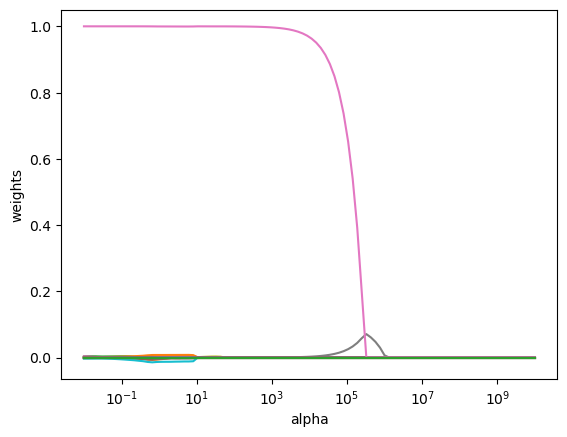

In [13]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5

coefficients= []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train , y_train)
    coefficients.append(lasso.coef_)
    
ax=plt.gca()
ax.plot(lambdalar * 2 ,coefficients)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")

### PREDICT

In [14]:
lasso_model.predict(X_test)

array([ 325.47761247, 1100.33212813,  362.4520676 ,  399.76394187,
        175.13795997,  525.09149803,  587.23395957,  431.45222803,
        350.08184699, 1899.89823335,  724.98189051,  341.61145138,
        499.98491169,  324.84103497,  765.01138761,  749.7013359 ,
        780.05457019,  415.10336336,  215.01339727,  234.89499951,
        799.71236042,  250.03311446, 1174.90297356,  225.01495719,
        550.07453139, 1670.25624332,  194.99266484,  424.99735493,
        612.51112517,  773.92024725,  249.90326012,  425.02162402,
        277.498111  ,  700.1573914 ,  305.03711787, 1975.07773303,
        774.92913342,  849.70716724,  145.08932647,  100.08001416,
       1800.86632736,  209.99538149,  350.05669696,  120.00898897,
        499.73493153,  155.10081164, 1939.95696932,   90.09794165,
        215.00188031,  190.01667118,  534.93766069, 1310.11247107,
        174.99461728,  776.49936804,   86.51105793, 1500.44012159,
        535.09750718,  429.70386317,  999.81578818,  215.00507

In [15]:
y_pred = lasso_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test , y_pred))

0.20051682979696034

### MODEL TUNING

In [17]:
from sklearn.linear_model import LassoCV

In [20]:
lasso_cv_model = LassoCV(alphas = None , 
                        cv=10 , 
                        max_iter = 10000 ) 
                        #normalize = True)

In [21]:
lasso_cv_model.fit(X_train , y_train)

LassoCV(cv=10, max_iter=10000)

In [22]:
lasso_cv_model.alpha_

534.6391044150597

In [23]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_)

In [24]:
lasso_tuned.fit(X_train , y_train)

Lasso(alpha=534.6391044150597)

In [25]:
y_pred = lasso_tuned.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test , y_pred))

1.464719881076012